In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [6]:
df= pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df= pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


<Axes: xlabel='label'>

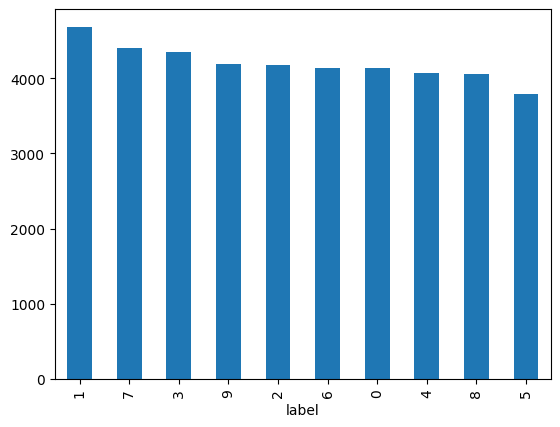

In [10]:
df["label"].value_counts().plot(kind="bar")

In [12]:
x = df.iloc[:,1:].values
y = df.iloc[:,:1]["label"]

In [13]:
x.shape ,y.shape

((42000, 784), (42000,))

In [14]:
x = x/255

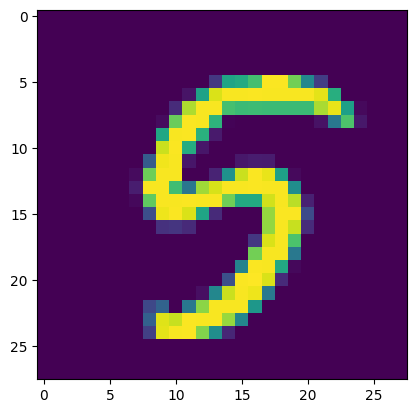

In [16]:
plt.imshow(x[8].reshape(28,28))

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20,stratify=y)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knm = KNeighborsClassifier(n_neighbors=10)
knm.fit(x_train,y_train)
knm.score(x_train,y_train) , knm.score(x_test,y_test) 

(0.9685374149659864, 0.9638095238095238)

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier()
rfm.fit(x_train,y_train)
rfm.score(x_train,y_train) , knm.score(x_test,y_test) 

(1.0, 0.9638095238095238)

In [19]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train) , mnb.score(x_test,y_test) 

(0.8243197278911565, 0.8248412698412698)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, MaxPool2D, Conv2D,Dropout

In [22]:
model = Sequential(
        [
            Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape = (28,28,1)),
            Conv2D(32, kernel_size=(3, 3), activation='relu' ),
            MaxPool2D(pool_size=(2, 2)),
            Dropout(0.25),
        
            Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
            Conv2D(64, kernel_size=(3, 3), activation='relu' ),
            MaxPool2D(pool_size=(2, 2)),
            Dropout(0.25),
            
            Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same' ),
            Conv2D(128, kernel_size=(3, 3), activation='relu' ),
            MaxPool2D(pool_size=(2, 2)),
            Dropout(0.25),
        
            Flatten(),        
            Dense(256, activation='relu'),
            Dropout(0.5),
            Dense(10, activation = "softmax")
        ]
        )

In [23]:
model.compile(optimizer="adam",loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=["accuracy"])

In [24]:
x_train.shape,y_train.shape

((29400, 784), (29400,))

In [25]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [26]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [27]:
history = model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test),)

Epoch 1/15


2024-02-19 04:29:47.657561: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1708316992.052549     353 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


919/919 [==============================] - 15s 7ms/step - loss: 0.4048 - accuracy: 0.8721 - val_loss: 0.1356 - val_accuracy: 0.9652
Epoch 2/15
919/919 [==============================] - 6s 6ms/step - loss: 0.1097 - accuracy: 0.9699 - val_loss: 0.0616 - val_accuracy: 0.9839
Epoch 3/15
919/919 [==============================] - 6s 7ms/step - loss: 0.0761 - accuracy: 0.9790 - val_loss: 0.0633 - val_accuracy: 0.9829
Epoch 4/15
919/919 [==============================] - 6s 6ms/step - loss: 0.0676 - accuracy: 0.9814 - val_loss: 0.0459 - val_accuracy: 0.9870
Epoch 5/15
919/919 [==============================] - 6s 6ms/step - loss: 0.0560 - accuracy: 0.9837 - val_loss: 0.0384 - val_accuracy: 0.9903
Epoch 6/15
919/919 [==============================] - 6s 6ms/step - loss: 0.0508 - accuracy: 0.9859 - val_loss: 0.0431 - val_accuracy: 0.9885
Epoch 7/15
919/919 [==============================] - 6s 6ms/step - loss: 0.0464 - accuracy: 0.9865 - val_loss: 0.0494 - val_accuracy: 0.9874
Epoch 8/15
919/9

In [28]:
model.evaluate(x_train,y_train) , model.evaluate(x_test,y_test)

394/394 [==============================] - 1s 3ms/step - loss: 0.0480 - accuracy: 0.9888


([0.012438949197530746, 0.9966326355934143],
 [0.048013683408498764, 0.9888095259666443])

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

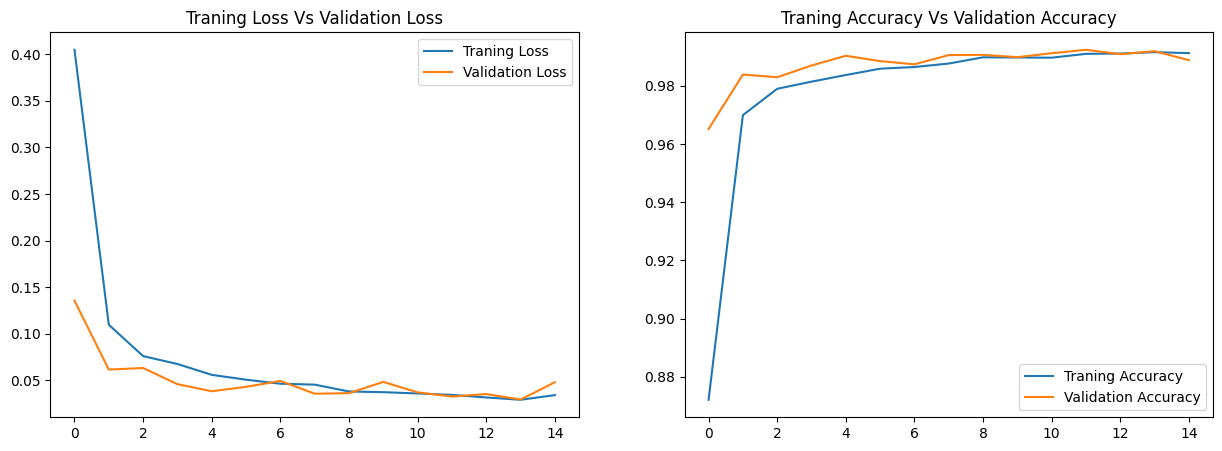

In [30]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(loss,label="Traning Loss")
plt.plot(val_loss,label="Validation Loss")
plt.title("Traning Loss Vs Validation Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(accuracy,label="Traning Accuracy")
plt.plot(val_accuracy,label="Validation Accuracy")
plt.title("Traning Accuracy Vs Validation Accuracy")
plt.legend()